## Detecting Phishing Websites using Neural Networks

The aim of the experiments conducted in this notebook is to give an idea of how modern _phishing website attacks_ can be prevented using machine learning. To do this, we are going to use the [Phishing Websites' Dataset](https://archive.ics.uci.edu/ml/datasets/phishing+websites). The viewers are requested to take a look at [this paper](https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Phishing%20Websites%20Features.docx) by the authors of the dataset. The paper discusses the data generation strategy in details and how the authors were able to come up with the most significant set of features for _detecting phishing websites_. 

We will start off the experiments by importing the initial set of Python modules.  

In [1]:
# Filter the uneccesary warnings
import warnings
warnings.filterwarnings("ignore")

# Import pandas and numpy
import pandas as pd
import numpy as np
import time

# Set the see
np.random.seed(666)

In [2]:
# Setup wandb
import wandb

wandb.init(project="phishing-websites-detection", name="logistic-regression")

W&B Run: https://app.wandb.ai/sayakpaul/phishing-websites-detection/runs/na8mlcl1

### Data loading and basic display

In [3]:
data = pd.read_csv('Phishing.csv')
data.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


### Displaying it in a bit easier manner

In [4]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1
URL_Length,1,1,0,0,0,0,0,0,0,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1
Favicon,1,1,1,1,1,1,1,1,1,1


**Quick observation**: The dataset is filled with -1, 0 and 1 values. Nothing else. So, we might not need fancy data scaling. 

### Inspecting data dimensions and column names

In [5]:
# Data dimension
data.shape

(11055, 31)

In [6]:
# Data columns
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

### Finding out the distribution of the class labels and preparing a report

In [7]:
from collections import Counter

classes = Counter(data['Result'].values)
classes.most_common()

[(1, 6157), (-1, 4898)]

In [8]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'Num_Observations'])
class_dist

,Class,Num_Observations
0,1,6157
1,-1,4898


### Preparing a basic bar plot of the distribution of the class labels

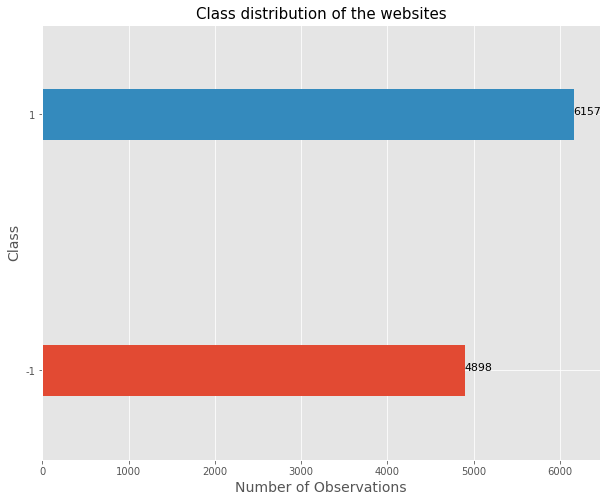

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

subplot = class_dist.groupby('Class')['Num_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

subplot.set_title('Class distribution of the websites', fontsize = 15)
subplot.set_xlabel('Number of Observations', fontsize = 14)
subplot.set_ylabel('Class', fontsize = 14)

for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(i.get_width()), fontsize=11)

### Finding out the summary statistics from the data

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


### Finding out the basic information of the columns present in the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma

### Mapping the `-1` values to `0` in the class labels

In [12]:
data.rename(columns={'Result': 'Class'}, inplace=True)

data['Class'] = data['Class'].map({-1:0, 1:1})
data['Class'].unique()

array([0, 1])

### Inspection of null values in the dataset

In [13]:
data.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Class     

### Data splitting

In [14]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,0:30].values.astype(int)
y = data.iloc[:,30].values.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

### Fitting the training data to the Logistic Regression classifier

The  dataset  contains  all  of  its  values  in -1,  0  and  1.  So,  linear  models  like  Logistic  Regression  are specifically  good  at  figuring  out  the  relationships  between  the  features  of  the  dataset  which  only contain -1, 0 and 1 values. 

In [15]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def train_eval_pipeline(model, train_data, test_data, name:str):
    (X_train, y_train) = train_data
    (X_test, y_test) = test_data
    
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time() - start
    prediction = model.predict(X_test)

    wandb.log({"accuracy":accuracy_score(y_test, prediction)*100.0,\
               "precision": precision_recall_fscore_support(y_test, prediction, average='macro')[0],
               "recall": precision_recall_fscore_support(y_test, prediction, average='macro')[1],
               "training_time":end})
    
    return 'Accuracy score: {}%, \
        model trained in {} secs'.format(accuracy_score(y_test, prediction)*100.0, end)

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
print(train_eval_pipeline(logreg, (X_train, y_train),
                         (X_test, y_test), 'logistic_regression'))

Accuracy score: 93.71325192220714%,         model trained in 0.1118619441986084 secs


### Hyperparameter tuning with random searching

In [17]:
# Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define the grid of values
penalty = ['l1', 'l2']
C = [0.8, 0.9, 1.0]
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 150, 200, 250]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(penalty=penalty, C=C, tol=tol, max_iter=max_iter)

In [18]:
# Instantiate RandomizedSearchCV with the required parameters
random_model = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv=5)

# Fit random_model to the data
random_model_result = random_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = random_model_result.best_score_, random_model_result.best_params_
print("Best score: %.2f using %s" % (best_score*100., best_params))

Best score: 92.44 using {'tol': 0.001, 'penalty': 'l1', 'max_iter': 250, 'C': 1.0}


In [19]:
wandb.init(project="phishing-websites-detection", name="logistic-regression-random-search")

W&B Run: https://app.wandb.ai/sayakpaul/phishing-websites-detection/runs/94rnc3jf

In [20]:
config = wandb.config

config.tol = 0.001
config.penalty = 'l1'
config.C = 1.0

In [21]:
logreg = LogisticRegression(tol=config.tol, penalty=config.penalty, max_iter=250, C=config.C)
print(train_eval_pipeline(logreg, (X_train, y_train),
                         (X_test, y_test), 'logistic_regression'))

Accuracy score: 93.80370872908186%,         model trained in 0.20843505859375 secs


### Trying to improve the predictive performance with Neural Networks

In [22]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import *
from wandb.keras import WandbCallback

In [23]:
import tensorflow as tf
tf.random.set_seed(666)

In [24]:
tf.__version__

'2.0.0'

In [25]:
wandb.init(project="phishing-websites-detection", name="neural-networks")

W&B Run: https://app.wandb.ai/sayakpaul/phishing-websites-detection/runs/yj0gdzmr

In [26]:
# Model building using the Sequential API
def get_training_model():
    model = Sequential()

    model.add(Dense(40, activation='relu',
              kernel_initializer='uniform',input_dim=X.shape[1]))
    model.add(Dense(30, activation='relu',
              kernel_initializer='uniform'))
    model.add(Dense(1,  activation='sigmoid', 
              kernel_initializer='uniform'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

In [27]:
model = get_training_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                1240      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 2,501
Trainable params: 2,501
Non-trainable params: 0
_________________________________________________________________


### Defining an EarlyStopping callback, training the model and evaluating the model

In [28]:
from tensorflow.keras import callbacks

es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5)

In [29]:
start = time.time()
history = model.fit(X_train, y_train, batch_size=64, epochs=128, verbose=1, \
                    callbacks=[es_cb, WandbCallback()])
end = time.time()-start
predictions = model.predict_classes(X_test)
wandb.log({"accuracy":accuracy_score(y_test, predictions)*100.0,\
           "precision": precision_recall_fscore_support(y_test, predictions, average='macro')[0],
           "recall": precision_recall_fscore_support(y_test, predictions, average='macro')[1],
           "training_time":end})

Train on 8844 samples
Epoch 1/128
8844/8844 [==============================] - 1s 126us/sample - loss: 0.4251 - accuracy: 0.8296
Epoch 2/128
8844/8844 [==============================] - 0s 33us/sample - loss: 0.2019 - accuracy: 0.9227
Epoch 3/128
8844/8844 [==============================] - 0s 31us/sample - loss: 0.1951 - accuracy: 0.9237
Epoch 4/128
8844/8844 [==============================] - 0s 32us/sample - loss: 0.1878 - accuracy: 0.9254
Epoch 5/128
8844/8844 [==============================] - 0s 31us/sample - loss: 0.1859 - accuracy: 0.9257
Epoch 6/128
8844/8844 [==============================] - 0s 32us/sample - loss: 0.1811 - accuracy: 0.9283
Epoch 7/128
8844/8844 [==============================] - 0s 31us/sample - loss: 0.1761 - accuracy: 0.9308
Epoch 8/128
8844/8844 [==============================] - 0s 38us/sample - loss: 0.1709 - accuracy: 0.9319
Epoch 9/128
8844/8844 [==============================] - 0s 37us/sample - loss: 0.1680 - accuracy: 0.9336
Epoch 10/128
8844/8844 

8844/8844 [==============================] - 0s 52us/sample - loss: 0.0660 - accuracy: 0.9740
Epoch 77/128
8844/8844 [==============================] - 1s 62us/sample - loss: 0.0677 - accuracy: 0.9716
Epoch 78/128
8844/8844 [==============================] - 1s 58us/sample - loss: 0.0675 - accuracy: 0.9708
Epoch 79/128
8844/8844 [==============================] - 1s 59us/sample - loss: 0.0661 - accuracy: 0.9724
Epoch 80/128
8844/8844 [==============================] - 1s 91us/sample - loss: 0.0627 - accuracy: 0.9750
Epoch 81/128
8844/8844 [==============================] - 1s 71us/sample - loss: 0.0654 - accuracy: 0.9737
Epoch 82/128
8844/8844 [==============================] - 0s 54us/sample - loss: 0.0657 - accuracy: 0.9729
Epoch 83/128
8844/8844 [==============================] - 0s 47us/sample - loss: 0.0644 - accuracy: 0.9737
Epoch 84/128
8844/8844 [==============================] - 0s 42us/sample - loss: 0.0623 - accuracy: 0.9744
Epoch 85/128
8844/8844 [==========================

### Model enhancement with TDLHBA hyperparameters and visualization

`TDLHBA` is technique introduced [in this paper](https://dl.acm.org/citation.cfm?id=3227655). We will use hyperparameter values as presented in the paper to see the performance enhancement of the model. 

In [30]:
wandb.init(project="phishing-websites-detection", name="neural-networks-tdlhba")

W&B Run: https://app.wandb.ai/sayakpaul/phishing-websites-detection/runs/voglwyed

In [31]:
# Building the model with the same topology as specified in the above-mentioned paper

model_TDLHBA = Sequential()

model_TDLHBA.add(Dense(40, activation='relu',
          kernel_initializer='uniform',input_dim=30))
model_TDLHBA.add(Dense(30, activation='relu',
          kernel_initializer='uniform'))
model_TDLHBA.add(Dense(1,  activation='sigmoid', 
          kernel_initializer='uniform'))

adam = Adam(lr=0.0017470)
model_TDLHBA.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [32]:
start = time.time()
history_TDLHBA = model_TDLHBA.fit(X_train, y_train, batch_size=10, epochs=100, 
                                  verbose=1, callbacks=[es_cb, WandbCallback()])

end = time.time() - start
predictions = model_TDLHBA.predict_classes(X_test)
wandb.log({"accuracy":accuracy_score(y_test, predictions)*100.0,\
           "precision": precision_recall_fscore_support(y_test, predictions, average='macro')[0],
           "recall": precision_recall_fscore_support(y_test, predictions, average='macro')[1],
           "training_time":end})

Train on 8844 samples
Epoch 1/100


W1124 17:18:37.698853 4401370560 callbacks.py:244] Method (on_train_batch_end) is slow compared to the batch update (2.008710). Check your callbacks.


  10/8844 [..............................] - ETA: 36:19 - loss: 0.6930 - accuracy: 0.7000

W1124 17:18:37.709312 4401370560 callbacks.py:244] Method (on_train_batch_end) is slow compared to the batch update (1.004383). Check your callbacks.


8844/8844 [==============================] - 4s 493us/sample - loss: 0.2376 - accuracy: 0.9030
Epoch 2/100
8844/8844 [==============================] - 2s 208us/sample - loss: 0.1862 - accuracy: 0.9267
Epoch 3/100
8844/8844 [==============================] - 2s 178us/sample - loss: 0.1662 - accuracy: 0.9331
Epoch 4/100
8844/8844 [==============================] - 2s 223us/sample - loss: 0.1485 - accuracy: 0.9376
Epoch 5/100
8844/8844 [==============================] - 2s 253us/sample - loss: 0.1355 - accuracy: 0.9426
Epoch 6/100
8844/8844 [==============================] - 2s 187us/sample - loss: 0.1268 - accuracy: 0.9450
Epoch 7/100
8844/8844 [==============================] - 2s 189us/sample - loss: 0.1188 - accuracy: 0.9492
Epoch 8/100
8844/8844 [==============================] - 2s 192us/sample - loss: 0.1117 - accuracy: 0.9533
Epoch 9/100
8844/8844 [==============================] - 2s 211us/sample - loss: 0.1050 - accuracy: 0.9539 - loss: 0.104 - ETA: 0s - loss: 0.1053 - accuracy

So, in this notebook, we took a quick look at how we can employ machine learning and other data science techniques to detect phishing websites. As a next step, you can wrap the final model as a REST API endpoint and use it along with a browser add-on. 